In [13]:
import pandas as pd
import numpy as np

path = "final_people_data.csv"
df = pd.read_csv(path)



In [14]:
df = df.rename(columns={df.columns[0]: 'ID'})
df = df.rename(columns={df.columns[5]: 'Instruction'})

df

,ID,First Name,Last Name,Age,Number children,Instruction,Experience,Years of unemployment,Working environment
0,0,Alan,Spencer,21,0,high school diploma,1,0,Worker
1,1,Emily,Myers,22,0,three-year degree,0,0,Instruction
2,2,Tiana,Spencer,18,0,high school diploma,0,0,Generic
3,3,Steven,Parker,18,0,high school diploma,0,0,Economic
4,4,Maddie,Cooper,30,2,three-year degree,7,1,Informatics
...,...,...,...,...,...,...,...,...,...
7015,7015,Chelsea,Perry,31,0,master,7,3,Informatics
7016,7016,Victoria,Barnes,32,2,high school diploma,1,1,Generic
7017,7017,Stella,Allen,37,2,high school diploma,12,3,Generic
7018,7018,Miley,Alexander,35,1,three-year degree,7,5,healthcare


In [15]:
name = df['First Name'].values
surname = df['Last Name'].values
age = df['Age'].values
nc = df['Number children'].values
instr= df['Instruction'].values
exp = df['Experience'].values
you = df['Years of unemployment'].values
we = df['Working environment'].values

In [16]:
def norm(x, vect):
    result = (vect[x])/(max(vect))
    return result

In [17]:
score = [0] * len(name)

unique_instr = list(set(instr))
# stampare il vettore con i nomi unici
print(unique_instr)
dict_instr= {
    "compulsory school" : 1,
    "high school diploma": 2,
    "three-year degree" : 3,
    "master degree": 4,
    "master": 5,
    "Ph.D": 6,
}

instr_score = [0]*len(instr)
for i in range(len(instr)):
    instr_score[i] = dict_instr[instr[i]]
print(instr_score)
print(dict_instr['master'])

['master', 'high school diploma', 'master degree', 'three-year degree', 'compulsory school', 'Ph.D']
[2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 4, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 4, 2, 1, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 3, 4, 2, 2, 3, 2, 2, 4, 2, 4, 5, 3, 3, 2, 3, 3, 5, 3, 3, 2, 3, 2, 4, 3, 2, 2, 4, 2, 1, 2, 4, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, 6, 2, 3, 3, 2, 2, 2, 6, 2, 2, 3, 3, 3, 3, 5, 2, 6, 2, 4, 4, 4, 3, 4, 4, 2, 5, 5, 2, 2, 2, 2, 4, 4, 2, 3, 2, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3

In [18]:
def assign_value(x, age):
    if min(age) <= age[x] <= 25:
        return 1
    elif 26 <= age[x] <= 35:
        return 3
    elif 36 <= age[x] <= 45:
        return 4
    elif 45 <= age[x] <= max(age):
        return 2
    else:
        return 0  # se x non appartiene a nessuno degli intervalli definiti

In [19]:
age_score = [0]*len(age)
for i in range(len(age)):
    age_score[i] = assign_value(i, age)
print(age_score)

[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 

In [20]:

for i in range(len(name)):
    score[i] = round(34 * norm(i, exp) + 23*norm(i, instr_score) +  20*norm(i, nc) + 12 *norm(i, age_score) + 11*norm(i, you))
    print("NUMERO " + str(i))

    print("esperienza")
    print(exp[i])
    print(34*norm(i, exp))

    print("istruzione")
    print(instr[i])
    print(23*norm(i, instr_score))

    print("figli")
    print(nc[i])
    print(20*norm(i, nc))

    print("età")
    print(age[i])
    print(12*norm(i, age_score))

    print("anni di disoccupazione")
    print(you[i])
    print(11*norm(i, you))

    print("score")
    print(score[i])
    print()

NUMERO 0
esperienza
1
1.7000000000000002
istruzione
high school diploma
7.666666666666666
figli
0
0.0
età
21
3.0
anni di disoccupazione
0
0.0
score
12

NUMERO 1
esperienza
0
0.0
istruzione
three-year degree
11.5
figli
0
0.0
età
22
3.0
anni di disoccupazione
0
0.0
score
14

NUMERO 2
esperienza
0
0.0
istruzione
high school diploma
7.666666666666666
figli
0
0.0
età
18
3.0
anni di disoccupazione
0
0.0
score
11

NUMERO 3
esperienza
0
0.0
istruzione
high school diploma
7.666666666666666
figli
0
0.0
età
18
3.0
anni di disoccupazione
0
0.0
score
11

NUMERO 4
esperienza
7
11.899999999999999
istruzione
three-year degree
11.5
figli
2
13.333333333333332
età
30
9.0
anni di disoccupazione
1
0.55
score
46

NUMERO 5
esperienza
0
0.0
istruzione
high school diploma
7.666666666666666
figli
0
0.0
età
23
3.0
anni di disoccupazione
0
0.0
score
11

NUMERO 6
esperienza
1
1.7000000000000002
istruzione
high school diploma
7.666666666666666
figli
0
0.0
età
18
3.0
anni di disoccupazione
0
0.0
score
12

NUMERO 7
e

In [21]:
import csv
# apertura del file in modalità scrittura
with open('scored.csv', mode='w', newline='') as file:

    # creazione dell'oggetto writer
    writer = csv.writer(file)

    # scrittura delle intestazioni delle colonne
    writer.writerow(['name', 'surname', 'score', 'working environment'])

    # scrittura dei dati
    for i in range(len(name)):
        writer.writerow([name[i], surname[i], score[i], we[i]])

with open('scored.csv', mode='r', newline='') as file:

    # creazione dell'oggetto reader
    reader = csv.DictReader(file)

    # lettura dei dati
    for row in reader:
        if (row['score'] == '0'):
            print(row)

In [22]:
import os
print(os.getcwd())

C:\Users\marco\Desktop\Programmazione\PYTHON\StableMatchingWorkers


In [23]:
path2 = "scored.csv"
df2 = pd.read_csv(path2)


In [24]:
condizione = (df2['score'] <= 20)
riga2 = df[ condizione ]
print("range 1-20")
print(riga2.shape)

condizione = df2['score'].between(20, 40)
riga2 = df[ condizione ]
print("range 21-40")
print(riga2.shape)

condizione = df2['score'].between(40, 60)
riga2 = df[ condizione ]
print("range 41-60")
print(riga2.shape)

condizione = df2['score'].between(60, 80)
riga2 = df[ condizione ]
print("range 61-80")
print(riga2.shape)

condizione = df2['score'].between(80, 100)
riga2 = df[ condizione ]
print("range 81-100")
print(riga2.shape)



range 1-20
(835, 9)
range 21-40
(1926, 9)
range 41-60
(3517, 9)
range 61-80
(989, 9)
range 81-100
(27, 9)


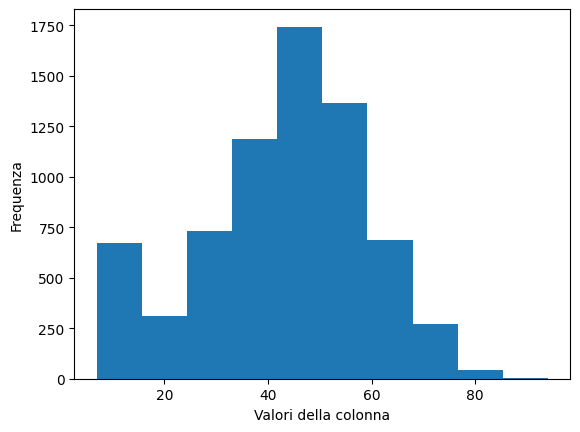

In [25]:
import matplotlib.pyplot as plt

# Seleziona la colonna di interesse
colonna = df2['score']

# Crea un istogramma della distribuzione della colonna
plt.hist(colonna)

# Aggiungi una label all'asse x
plt.xlabel('Valori della colonna')

# Aggiungi una label all'asse y
plt.ylabel('Frequenza')

# Mostra il plot
plt.show()

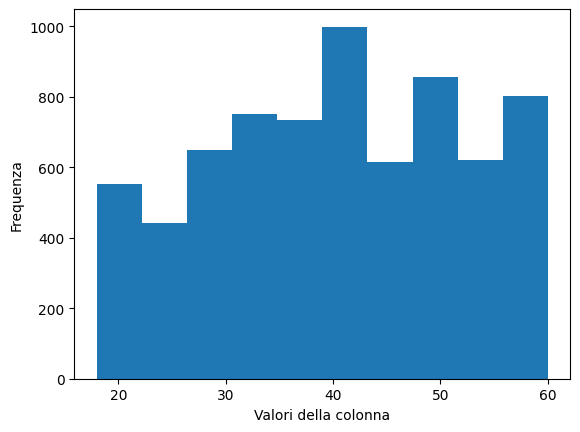

In [26]:
# Seleziona la colonna di interesse
colonna = df['Age']

# Crea un istogramma della distribuzione della colonna
plt.hist(colonna)

# Aggiungi una label all'asse x
plt.xlabel('Valori della colonna')

# Aggiungi una label all'asse y
plt.ylabel('Frequenza')

# Mostra il plot
plt.show()

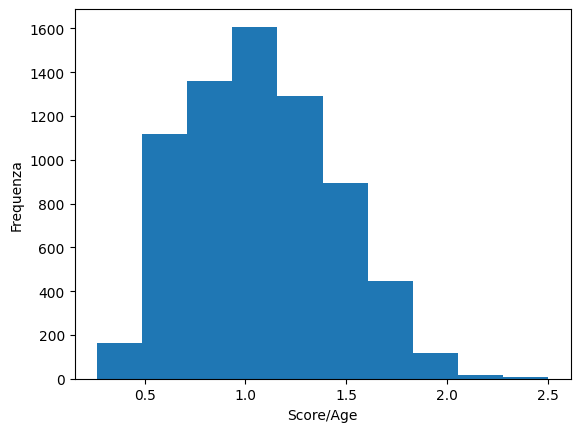

In [27]:
Age = df['Age']
Score = df2['score']

rapp = Score/Age

# Crea un istogramma della distribuzione della divisione tra le due colonne
plt.hist(rapp)

# Aggiungi una label all'asse x
plt.xlabel('Score/Age')

# Aggiungi una label all'asse y
plt.ylabel('Frequenza')

# Mostra il plot
plt.show()

In [28]:
import os

# Get the current working directory
current_dir_path = os.getcwd()

# Create a folder in the same directory as the .py file
folder_name = "environments_score"
folder_path = os.path.join(current_dir_path, folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)



In [29]:
working_environments = df2['working environment'].unique()

# Itera su ogni valore unico e salva i dati in un file CSV separato
for environment in working_environments:
    # Seleziona solo le righe con il valore specifico dell'ambiente di lavoro
    df_environment = df2[df2['working environment'] == environment]

    # Ordina le righe in base al punteggio in ordine decrescente
    df_environment = df_environment.sort_values('score', ascending=False)

    # Imposta il nome del file
    file_name = "{}_{}.csv".format(environment.lower(), 'score')

    # Salva il dataframe come file CSV
    file_path = os.path.join(folder_path, file_name)
    df_environment.to_csv(file_path, index=False)